# Project: Wrangling and Analyze Data

In [1]:
# Import libraries required for the analysis

import pandas as pd
import numpy as np
import tweepy
from tweepy import OAuthHandler
import json
import re
from timeit import default_timer as timer
import requests
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## Data Gathering
In the cell below, gather **all** three pieces of data for this project and load them in the notebook. **Note:** the methods required to gather each data are different.
1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [2]:
# read the provided csv file 
arch=pd.read_csv('twitter-archive-enhanced-2.csv')

2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [3]:
# use 'requests' to get url for the second file programmatically
# then store in the same directory as the juypter notebook

url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
r = requests.get(url)

with open(url.split('/')[-1], mode='wb') as file:
    file.write(r.content)

In [4]:
# read the tsv file
predict = pd.read_csv('image-predictions.tsv', sep='\t')

3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [5]:
# Authenticate  credentials
consumer_key = 'secret'
consumer_secret = 'secret'
access_token = 'secret'
access_secret = 'secret'

# Authenticate to Twitter

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, parser=tweepy.parsers.JSONParser(), wait_on_rate_limit = True) 

In [6]:
tweet_ids = arch.tweet_id.values

failed_dict = [] # list to store the failed request 

with open('tweet_json.txt', 'w', encoding='utf8') as file:
    for tweet_id in tweet_ids:
        try:
            tweets = api.get_status(tweet_id, tweet_mode='extended') #tweet_mode = "extended" to retrieve the full text
            json.dump(tweets, file)
            file.write('\n')
            
        except Exception as err_msg:
            print(str(tweet_id)+ " - " + str(err_msg))
            failed_dict.append(tweet_id)

888202515573088257 - 404 Not Found
144 - No status found with that ID.
873697596434513921 - 404 Not Found
144 - No status found with that ID.
872668790621863937 - 404 Not Found
144 - No status found with that ID.
872261713294495745 - 404 Not Found
144 - No status found with that ID.
869988702071779329 - 404 Not Found
144 - No status found with that ID.
866816280283807744 - 404 Not Found
144 - No status found with that ID.
861769973181624320 - 404 Not Found
144 - No status found with that ID.
856602993587888130 - 404 Not Found
144 - No status found with that ID.
856330835276025856 - 404 Not Found
144 - No status found with that ID.
851953902622658560 - 404 Not Found
144 - No status found with that ID.
851861385021730816 - 404 Not Found
144 - No status found with that ID.
845459076796616705 - 404 Not Found
144 - No status found with that ID.
844704788403113984 - 404 Not Found
144 - No status found with that ID.
842892208864923648 - 404 Not Found
144 - No status found with that ID.
837366

Rate limit reached. Sleeping for: 45


754011816964026368 - 404 Not Found
144 - No status found with that ID.
680055455951884288 - 404 Not Found
144 - No status found with that ID.


Rate limit reached. Sleeping for: 54


In [7]:
len(failed_dict)

29

In [8]:
 # Rerun to get more tweets from the failed request
    
tweet_ids = arch.tweet_id.values

failed_dict_final = [] # list to store the failed request 

with open('tweet_json.txt', 'w', encoding='utf8') as file:
    for tweet_id in tweet_ids:
        try:
            tweets = api.get_status(tweet_id, tweet_mode='extended') #tweet_mode = "extended" to retrieve the full text
            json.dump(tweets, file)
            file.write('\n')
            
        except Exception as err_msg:
            print(str(tweet_id)+ " - " + str(err_msg))
            failed_dict_final.append(tweet_id)

888202515573088257 - 404 Not Found
144 - No status found with that ID.
873697596434513921 - 404 Not Found
144 - No status found with that ID.
872668790621863937 - 404 Not Found
144 - No status found with that ID.
872261713294495745 - 404 Not Found
144 - No status found with that ID.
869988702071779329 - 404 Not Found
144 - No status found with that ID.
866816280283807744 - 404 Not Found
144 - No status found with that ID.
861769973181624320 - 404 Not Found
144 - No status found with that ID.
856602993587888130 - 404 Not Found
144 - No status found with that ID.
856330835276025856 - 404 Not Found
144 - No status found with that ID.
851953902622658560 - 404 Not Found
144 - No status found with that ID.
851861385021730816 - 404 Not Found
144 - No status found with that ID.
845459076796616705 - 404 Not Found
144 - No status found with that ID.
844704788403113984 - 404 Not Found
144 - No status found with that ID.
842892208864923648 - 404 Not Found
144 - No status found with that ID.
837366

In [9]:
len(failed_dict_final)

30

In [10]:
# load tweets stautus json file after gathering 
json_tweet = pd.read_json('tweet_json.txt', lines = True,encoding='utf-8') 

In [11]:
json_tweet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2326 entries, 0 to 2325
Data columns (total 32 columns):
 #   Column                         Non-Null Count  Dtype              
---  ------                         --------------  -----              
 0   created_at                     2326 non-null   datetime64[ns, UTC]
 1   id                             2326 non-null   int64              
 2   id_str                         2326 non-null   int64              
 3   full_text                      2326 non-null   object             
 4   truncated                      2326 non-null   bool               
 5   display_text_range             2326 non-null   object             
 6   entities                       2326 non-null   object             
 7   extended_entities              2056 non-null   object             
 8   source                         2326 non-null   object             
 9   in_reply_to_status_id          77 non-null     float64            
 10  in_reply_to_status_id_st

## Assessing Data
In this section, detect and document at least **eight (8) quality issues and two (2) tidiness issue**. You must use **both** visual assessment
programmatic assessement to assess the data.

**Note:** pay attention to the following key points when you access the data.

* You only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.
* Assessing and cleaning the entire dataset completely would require a lot of time, and is not necessary to practice and demonstrate your skills in data wrangling. Therefore, the requirements of this project are only to assess and clean at least 8 quality issues and at least 2 tidiness issues in this dataset.
* The fact that the rating numerators are greater than the denominators does not need to be cleaned. This [unique rating system](http://knowyourmeme.com/memes/theyre-good-dogs-brent) is a big part of the popularity of WeRateDogs.
* You do not need to gather the tweets beyond August 1st, 2017. You can, but note that you won't be able to gather the image predictions for these tweets since you don't have access to the algorithm used.



In [12]:
arch

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
0     892420643555336193                    NaN                  NaN   
1     892177421306343426                    NaN                  NaN   
2     891815181378084864                    NaN                  NaN   
3     891689557279858688                    NaN                  NaN   
4     891327558926688256                    NaN                  NaN   
...                  ...                    ...                  ...   
2351  666049248165822465                    NaN                  NaN   
2352  666044226329800704                    NaN                  NaN   
2353  666033412701032449                    NaN                  NaN   
2354  666029285002620928                    NaN                  NaN   
2355  666020888022790149                    NaN                  NaN   

                      timestamp  \
0     2017-08-01 16:23:56 +0000   
1     2017-08-01 00:17:27 +0000   
2     2017-07-31 00:18:03 +0000   
3     2017-07-30 15:58:51 +0000   
4     2017-07-29 16:00:24 +0000   
...                         ...   
2351  2015-11-16 00:24:50 +0000   
2352  2015-11-16 00:04:52 +0000   
2353  2015-11-15 23:21:54 +0000   
2354  2015-11-15 23:05:30 +0000   
2355  2015-11-15 22:32:08 +0000   

                                                 source  \
0     <a href="http://twitter.com/download/iphone" r...   
1     <a href="http://twitter.com/download/iphone" r...   
2     <a href="http://twitter.com/download/iphone" r...   
3     <a href="http://twitter.com/download/iphone" r...   
4     <a href="http://twitter.com/download/iphone" r...   
...                                                 ...   
2351  <a href="http://twitter.com/download/iphone" r...   
2352  <a href="http://twitter.com/download/iphone" r...   
2353  <a href="http://twitter.com/download/iphone" r...   
2354  <a href="http://twitter.com/download/iphone" r...   
2355  <a href="http://twitter.com/download/iphone" r...   

                                                   text  retweeted_status_id  \
0     This is Phineas. He's a mystical boy. Only eve...                  NaN   
1     This is Tilly. She's just checking pup on you....                  NaN   
2     This is Archie. He is a rare Norwegian Pouncin...                  NaN   
3     This is Darla. She commenced a snooze mid meal...                  NaN   
4     This is Franklin. He would like you to stop ca...                  NaN   
...                                                 ...                  ...   
2351  Here we have a 1949 1st generation vulpix. Enj...                  NaN   
2352  This is a purebred Piers Morgan. Loves to Netf...                  NaN   
2353  Here is a very happy pup. Big fan of well-main...                  NaN   
2354  This is a western brown Mitsubishi terrier. Up...                  NaN   
2355  Here we have a Japanese Irish Setter. Lost eye...                  NaN   

      retweeted_status_user_id retweeted_status_timestamp  \
0                          NaN                        NaN   
1                          NaN                        NaN   
2                          NaN                        NaN   
3                          NaN                        NaN   
4                          NaN                        NaN   
...                        ...                        ...   
2351                       NaN                        NaN   
2352                       NaN                        NaN   
2353                       NaN                        NaN   
2354                       NaN                        NaN   
2355                       NaN                        NaN   

                                          expanded_urls  rating_numerator  \
0     https://twitter.com/dog_rates/status/892420643...                13   
1     https://twitter.com/dog_rates/status/892177421...                13   
2     https://twitter.com/dog_rates/status/891815181...                12   
3     https://twitt

In [13]:
predict

tweet_id                                          jpg_url  \
0     666020888022790149  https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg   
1     666029285002620928  https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg   
2     666033412701032449  https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg   
3     666044226329800704  https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg   
4     666049248165822465  https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg   
...                  ...                                              ...   
2070  891327558926688256  https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg   
2071  891689557279858688  https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg   
2072  891815181378084864  https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg   
2073  892177421306343426  https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg   
2074  892420643555336193  https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg   

      img_num                      p1   p1_conf  p1_dog                  p2  \
0           1  Welsh_springer_spaniel  0.465074    True              collie   
1           1                 redbone  0.506826    True  miniature_pinscher   
2           1         German_shepherd  0.596461    True            malinois   
3           1     Rhodesian_ridgeback  0.408143    True             redbone   
4           1      miniature_pinscher  0.560311    True          Rottweiler   
...       ...                     ...       ...     ...                 ...   
2070        2                  basset  0.555712    True    English_springer   
2071        1             paper_towel  0.170278   False  Labrador_retriever   
2072        1               Chihuahua  0.716012    True            malamute   
2073        1               Chihuahua  0.323581    True            Pekinese   
2074        1                  orange  0.097049   False               bagel   

       p2_conf  p2_dog                           p3   p3_conf  p3_dog  
0     0.156665    True            Shetland_sheepdog  0.061428    True  
1     0.074192    True          Rhodesian_ridgeback  0.072010    True  
2     0.138584    True                   bloodhound  0.116197    True  
3     0.360687    True           miniature_pinscher  0.222752    True  
4     0.243682    True                     Doberman  0.154629    True  
...        ...     ...                          ...       ...     ...  
2070  0.225770    True  German_short-haired_pointer  0.175219    True  
2071  0.168086    True                      spatula  0.040836   False  
2072  0.078253    True                       kelpie  0.031379    True  
2073  0.090647    True                     papillon  0.068957    True  
2074  0.085851   False                       banana  0.076110   False  

[2075 rows x 12 columns]

In [14]:
json_tweet

created_at                  id              id_str  \
0    2017-08-01 16:23:56+00:00  892420643555336193  892420643555336192   
1    2017-08-01 00:17:27+00:00  892177421306343426  892177421306343424   
2    2017-07-31 00:18:03+00:00  891815181378084864  891815181378084864   
3    2017-07-30 15:58:51+00:00  891689557279858688  891689557279858688   
4    2017-07-29 16:00:24+00:00  891327558926688256  891327558926688256   
...                        ...                 ...                 ...   
2321 2015-11-16 00:24:50+00:00  666049248165822465  666049248165822464   
2322 2015-11-16 00:04:52+00:00  666044226329800704  666044226329800704   
2323 2015-11-15 23:21:54+00:00  666033412701032449  666033412701032448   
2324 2015-11-15 23:05:30+00:00  666029285002620928  666029285002620928   
2325 2015-11-15 22:32:08+00:00  666020888022790149  666020888022790144   

                                              full_text  truncated  \
0     This is Phineas. He's a mystical boy. Only eve...      False   
1     This is Tilly. She's just checking pup on you....      False   
2     This is Archie. He is a rare Norwegian Pouncin...      False   
3     This is Darla. She commenced a snooze mid meal...      False   
4     This is Franklin. He would like you to stop ca...      False   
...                                                 ...        ...   
2321  Here we have a 1949 1st generation vulpix. Enj...      False   
2322  This is a purebred Piers Morgan. Loves to Netf...      False   
2323  Here is a very happy pup. Big fan of well-main...      False   
2324  This is a western brown Mitsubishi terrier. Up...      False   
2325  Here we have a Japanese Irish Setter. Lost eye...      False   

     display_text_range                                           entities  \
0               [0, 85]  {'hashtags': [], 'symbols': [], 'user_mentions...   
1              [0, 138]  {'hashtags': [], 'symbols': [], 'user_mentions...   
2              [0, 121]  {'hashtags': [], 'symbols': [], 'user_mentions...   
3               [0, 79]  {'hashtags': [], 'symbols': [], 'user_mentions...   
4              [0, 138]  {'hashtags': [{'text': 'BarkWeek', 'indices': ...   
...                 ...                                                ...   
2321           [0, 120]  {'hashtags': [], 'symbols': [], 'user_mentions...   
2322           [0, 137]  {'hashtags': [], 'symbols': [], 'user_mentions...   
2323           [0, 130]  {'hashtags': [], 'symbols': [], 'user_mentions...   
2324           [0, 139]  {'hashtags': [], 'symbols': [], 'user_mentions...   
2325           [0, 131]  {'hashtags': [], 'symbols': [], 'user_mentions...   

                                      extended_entities  \
0     {'media': [{'id': 892420639486877696, 'id_str'...   
1     {'media': [{'id': 892177413194625024, 'id_str'...   
2     {'media': [{'id': 891815175371796480, 'id_str'...   
3     {'media': [{'id': 891689552724799489, 'id_str'...   
4     {'media': [{'id': 891327551943041024, 'id_str'...   
...                                                 ...   
2321  {'media': [{'id': 666049244999131136, 'id_str'...   
2322  {'media': [{'id': 666044217047650304, 'id_str'...   
2323  {'media': [{'id': 666033409081393153, 'id_str'...   
2324  {'media': [{'id': 666029276303482880, 'id_str'...   
2325  {'media': [{'id': 666020881337073664, 'id_str'...   

                                                 source  \
0     <a href="http://twitter.com/download/iphone" r...   
1     <a href="http://twitter.com/download/iphone" r...   
2     <a href="http://twitter.com/download/iphone" r...   
3     <a href="http://twitter.com/download/iphone" r...   
4     <a href="http://twitter.com/download/iphone" r...   
...                                                 ...   
2321  <a href="http://twitter.com/download/iphone" r...   
2322  <a href="http://twitter.com/download/iphone" r...   
2323  <a href="http://twitter.com/download/iphone" r...   
2324  <a href="http://twitter.com/download/iphone" r..

In [15]:
# Check for outliers in the rating_denominator
pd.set_option('max_colwidth', 250) # source: https://stackoverflow.com/questions/39680147/can-i-set-variable-column-widths-in-pandas
arch.query('rating_denominator > 10')[['tweet_id','text','rating_denominator']]

tweet_id  \
342   832088576586297345   
433   820690176645140481   
784   775096608509886464   
902   758467244762497024   
1068  740373189193256964   
1120  731156023742988288   
1165  722974582966214656   
1202  716439118184652801   
1228  713900603437621249   
1254  710658690886586372   
1274  709198395643068416   
1351  704054845121142784   
1433  697463031882764288   
1598  686035780142297088   
1634  684225744407494656   
1635  684222868335505415   
1662  682962037429899265   
1663  682808988178739200   
1779  677716515794329600   
1843  675853064436391936   

                                                                                                                                                    text  \
342                                                                                                             @docmisterio account started on 11/15/15   
433                                                  The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd   
784         RT @dog_rates: After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https:/…   
902                                                                       Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE   
1068        After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ   
1120                           Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv   
1165                                                                                    Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a   
1202                               This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq   
1228                                                       Happy Saturday here's 9 puppers on a bench. 99/90 good work everybody https://t.co/mpvaVxKmc1   
1254                                        Here's a brigade of puppers. All look very prepared for whatever happens next. 80/80 https://t.co/0eb7R1Om12   
1274  From left to right:\nCletus, Jerome, Alejandro, Burp, &amp; Titson\nNone know where camera is. 45/50 would hug all at once https://t.co/sedre1ivTK   
1351                                                                  Here is a whole flock of puppers.  60/50 I'll take the lot https://t.co/9dpcw6MdWa   
1433                                                        Happy Wednesday here's a bucket of pups. 44/40 would pet all at once https://t.co/HppvrYuamZ   
1598            Yes I do realize a rating of 4/20 would've been fitting. However, it would be unjust to give these cooperative pups that low of a rating   
1634                      Two sneaky puppers were not initially seen, moving the rating to 143/130. Please forgive us. Thank you https://t.co/kRK51Y5ac3   
1635        Someone help the girl is being mugged. Several are distracting her while two steal her shoes. Clever puppers 121/110 https://t.co/1zfnTJLt55   
1662         This is Darrel. He just robbed a 7/11 and is in a high speed police chase. Was just spotted by the helicopter 10/10 https://t.co/7EsP8LmSp5   
1663         I'm aware that I could've said 20/16, but here at WeRateDogs we are very professional. An inconsistent rating scale is simply irresponsible   
1779                                                                              IT'S PUPPERGEDDON. Total of 144/120 ...I think https://t.co/ZanVtAtvIq   
1843                                         Here we have an entire platoon of puppers. Total score: 88/80 would pet all at once https://t.co/y93p6FLvVw   

      rating_denominator  
342                   15  
433                   70  
784                   11  
902                  150  
1068           

In [16]:
# Check for outliers in the rating_numerator
#Assuming numerator rating max is 20
pd.set_option('max_colwidth', 250) # source: https://stackoverflow.com/questions/39680147/can-i-set-variable-column-widths-in-pandas
arch.query('rating_numerator > 20')[['tweet_id','text','rating_numerator']]

tweet_id  \
188   855862651834028034   
189   855860136149123072   
290   838150277551247360   
313   835246439529840640   
340   832215909146226688   
433   820690176645140481   
516   810984652412424192   
695   786709082849828864   
763   778027034220126208   
902   758467244762497024   
979   749981277374128128   
1120  731156023742988288   
1202  716439118184652801   
1228  713900603437621249   
1254  710658690886586372   
1274  709198395643068416   
1351  704054845121142784   
1433  697463031882764288   
1634  684225744407494656   
1635  684222868335505415   
1712  680494726643068929   
1779  677716515794329600   
1843  675853064436391936   
2074  670842764863651840   

                                                                                                                                                                           text  \
188                                                                                      @dhmontgomery We also gave snoop dogg a 420/10 but I think that predated your research   
189                                       @s8n You tried very hard to portray this good boy as not so good, but you have ultimately failed. His goodness shines through. 666/10   
290                                                                                                                                                          @markhoppus 182/10   
313                                                                          @jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho   
340                                RT @dog_rates: This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wu…   
433                                                                         The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd   
516   Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx   
695                                            This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS   
763           This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq   
902                                                                                              Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE   
979                                                                                              This is Atticus. He's quite simply America af. 1776/10 https://t.co/GRXwMxLBkh   
1120                                                  Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv   
1202                                                      This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq   
1228                                                                              Happy Saturday here's 9 puppers on a bench. 99/90 good work everybody https://t.co/mpvaVxKmc1   
1254                                                               Here's a brigade of puppers. All look very prepared for whatever happens next. 80/80 https://t.co/0eb7R1Om12   
1274                         From left to right:\nCletus, Jerome, Alejandro, Burp, &amp; Titson\nNone know where camera is. 45/50 would hug all at once https://t.co/sedre1ivTK   
1351                                                                                         Here is a whole flock of puppers.  60/50 I'll take the lot https://t.co/9dpcw6MdWa   
1433                                                                               Happy Wedn

In [17]:
arch.head()

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
0  892420643555336193                    NaN                  NaN   
1  892177421306343426                    NaN                  NaN   
2  891815181378084864                    NaN                  NaN   
3  891689557279858688                    NaN                  NaN   
4  891327558926688256                    NaN                  NaN   

                   timestamp  \
0  2017-08-01 16:23:56 +0000   
1  2017-08-01 00:17:27 +0000   
2  2017-07-31 00:18:03 +0000   
3  2017-07-30 15:58:51 +0000   
4  2017-07-29 16:00:24 +0000   

                                                                               source  \
0  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   
1  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   
2  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   
3  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   
4  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   

                                                                                                                                                                 text  \
0                                                       This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU   
1  This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV   
2                   This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB   
3                                                             This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ   
4  This is Franklin. He would like you to stop calling him "cute." He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f   

   retweeted_status_id  retweeted_status_user_id retweeted_status_timestamp  \
0                  NaN                       NaN                        NaN   
1                  NaN                       NaN                        NaN   
2                  NaN                       NaN                        NaN   
3                  NaN                       NaN                        NaN   
4                  NaN                       NaN                        NaN   

                                                                                                                     expanded_urls  \
0                                                                  https://twitter.com/dog_rates/status/892420643555336193/photo/1   
1                                                                  https://twitter.com/dog_rates/status/892177421306343426/photo/1   
2                                                                  https://twitter.com/dog_rates/status/891815181378084864/photo/1   
3                                                                  https://twitter.com/dog_rates/status/891689557279858688/photo/1   
4  https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1   

   rating_numerator  rating_denominator      name doggo floofer pupper puppo  
0                13                  10   Phineas  None    None   None  None  
1                13                  10     Tilly  None    None   None  None  
2                12                  10    Archie  None    None   None  None  
3                13                  10     Darla  None    None   None  None  
4                12                  10  Franklin  None    None   None  None

In [18]:
arch.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [19]:
arch.describe()

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
count  2.356000e+03           7.800000e+01         7.800000e+01   
mean   7.427716e+17           7.455079e+17         2.014171e+16   
std    6.856705e+16           7.582492e+16         1.252797e+17   
min    6.660209e+17           6.658147e+17         1.185634e+07   
25%    6.783989e+17           6.757419e+17         3.086374e+08   
50%    7.196279e+17           7.038708e+17         4.196984e+09   
75%    7.993373e+17           8.257804e+17         4.196984e+09   
max    8.924206e+17           8.862664e+17         8.405479e+17   

       retweeted_status_id  retweeted_status_user_id  rating_numerator  \
count         1.810000e+02              1.810000e+02       2356.000000   
mean          7.720400e+17              1.241698e+16         13.126486   
std           6.236928e+16              9.599254e+16         45.876648   
min           6.661041e+17              7.832140e+05          0.000000   
25%           7.186315e+17              4.196984e+09         10.000000   
50%           7.804657e+17              4.196984e+09         11.000000   
75%           8.203146e+17              4.196984e+09         12.000000   
max           8.874740e+17              7.874618e+17       1776.000000   

       rating_denominator  
count         2356.000000  
mean            10.455433  
std              6.745237  
min              0.000000  
25%             10.000000  
50%             10.000000  
75%             10.000000  
max            170.000000

In [20]:
arch.rating_numerator.sort_values()

315        0
1016       0
2335       1
2261       1
2338       1
        ... 
2074     420
188      420
189      666
313      960
979     1776
Name: rating_numerator, Length: 2356, dtype: int64

In [21]:
arch.rating_denominator.sort_values()

313       0
2335      2
516       7
1576     10
1575     10
       ... 
1635    110
1779    120
1634    130
902     150
1120    170
Name: rating_denominator, Length: 2356, dtype: int64

In [22]:
arch[arch['tweet_id'].isnull()]

Empty DataFrame
Columns: [tweet_id, in_reply_to_status_id, in_reply_to_user_id, timestamp, source, text, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp, expanded_urls, rating_numerator, rating_denominator, name, doggo, floofer, pupper, puppo]
Index: []

In [23]:
predict.head()

tweet_id                                          jpg_url  \
0  666020888022790149  https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg   
1  666029285002620928  https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg   
2  666033412701032449  https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg   
3  666044226329800704  https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg   
4  666049248165822465  https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg   

   img_num                      p1   p1_conf  p1_dog                  p2  \
0        1  Welsh_springer_spaniel  0.465074    True              collie   
1        1                 redbone  0.506826    True  miniature_pinscher   
2        1         German_shepherd  0.596461    True            malinois   
3        1     Rhodesian_ridgeback  0.408143    True             redbone   
4        1      miniature_pinscher  0.560311    True          Rottweiler   

    p2_conf  p2_dog                   p3   p3_conf  p3_dog  
0  0.156665    True    Shetland_sheepdog  0.061428    True  
1  0.074192    True  Rhodesian_ridgeback  0.072010    True  
2  0.138584    True           bloodhound  0.116197    True  
3  0.360687    True   miniature_pinscher  0.222752    True  
4  0.243682    True             Doberman  0.154629    True

In [24]:
predict.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [25]:
arch.tweet_id.duplicated().sum()

0

In [26]:
predict.describe()

tweet_id      img_num      p1_conf       p2_conf       p3_conf
count  2.075000e+03  2075.000000  2075.000000  2.075000e+03  2.075000e+03
mean   7.384514e+17     1.203855     0.594548  1.345886e-01  6.032417e-02
std    6.785203e+16     0.561875     0.271174  1.006657e-01  5.090593e-02
min    6.660209e+17     1.000000     0.044333  1.011300e-08  1.740170e-10
25%    6.764835e+17     1.000000     0.364412  5.388625e-02  1.622240e-02
50%    7.119988e+17     1.000000     0.588230  1.181810e-01  4.944380e-02
75%    7.932034e+17     1.000000     0.843855  1.955655e-01  9.180755e-02
max    8.924206e+17     4.000000     1.000000  4.880140e-01  2.734190e-01

In [27]:
predict.tweet_id.duplicated().sum()

0

In [28]:
predict.tweet_id.value_counts()

666020888022790149    1
761292947749015552    1
767122157629476866    1
766793450729734144    1
766693177336135680    1
                     ..
684097758874210310    1
683857920510050305    1
683852578183077888    1
683849932751646720    1
892420643555336193    1
Name: tweet_id, Length: 2075, dtype: int64

In [29]:
predict[predict['tweet_id'].isnull()]

Empty DataFrame
Columns: [tweet_id, jpg_url, img_num, p1, p1_conf, p1_dog, p2, p2_conf, p2_dog, p3, p3_conf, p3_dog]
Index: []

In [30]:
# Assess the ratings for any abnormalities
with pd.option_context('max_colwidth', 350):
    display(arch[arch['text'].str.contains(r"(\d+\.\d*\/\d+)")]
            [['tweet_id', 'text', 'rating_numerator', 'rating_denominator']])

C:\Users\Ibukun\AppData\Local\Temp\ipykernel_11040\4112708455.py:3: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  display(arch[arch['text'].str.contains(r"(\d+\.\d*\/\d+)")]


tweet_id  \
45    883482846933004288   
340   832215909146226688   
695   786709082849828864   
763   778027034220126208   
1689  681340665377193984   
1712  680494726643068929   

                                                                                                                                                                   text  \
45                             This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948   
340                        RT @dog_rates: This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wu…   
695                                    This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS   
763   This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq   
1689                                                         I've been told there's a slight possibility he's checking his mirror. We'll bump to 9.5/10. Still a menace   
1712                                                         Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/eNm2S6p9BD   

      rating_numerator  rating_denominator  
45                   5                  10  
340                 75                  10  
695                 75                  10  
763                 27                  10  
1689                 5                  10  
1712                26                  10

In [31]:
json_tweet.head()

created_at                  id              id_str  \
0 2017-08-01 16:23:56+00:00  892420643555336193  892420643555336192   
1 2017-08-01 00:17:27+00:00  892177421306343426  892177421306343424   
2 2017-07-31 00:18:03+00:00  891815181378084864  891815181378084864   
3 2017-07-30 15:58:51+00:00  891689557279858688  891689557279858688   
4 2017-07-29 16:00:24+00:00  891327558926688256  891327558926688256   

                                                                                                                                                            full_text  \
0                                                       This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU   
1  This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV   
2                   This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB   
3                                                             This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ   
4  This is Franklin. He would like you to stop calling him "cute." He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f   

   truncated display_text_range  \
0      False            [0, 85]   
1      False           [0, 138]   
2      False           [0, 121]   
3      False            [0, 79]   
4      False           [0, 138]   

                                                                                                                                                                                                                                                    entities  \
0  {'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [], 'media': [{'id': 892420639486877696, 'id_str': '892420639486877696', 'indices': [86, 109], 'media_url': 'http://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg', 'media_url_https': 'https:/...   
1  {'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [], 'media': [{'id': 892177413194625024, 'id_str': '892177413194625024', 'indices': [139, 162], 'media_url': 'http://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg', 'media_url_https': 'https:...   
2  {'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [], 'media': [{'id': 891815175371796480, 'id_str': '891815175371796480', 'indices': [122, 145], 'media_url': 'http://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg', 'media_url_https': 'https:...   
3  {'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [], 'media': [{'id': 891689552724799489, 'id_str': '891689552724799489', 'indices': [80, 103], 'media_url': 'http://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg', 'media_url_https': 'https:/...   
4  {'hashtags': [{'text': 'BarkWeek', 'indices': [129, 138]}], 'symbols': [], 'user_mentions': [], 'urls': [], 'media': [{'id': 891327551943041024, 'id_str': '891327551943041024', 'indices': [139, 162], 'media_url': 'http://pbs.twimg.com/media/DF6hr...   

                                                                                                                                                                                                                                           extended_entities  \
0  {'media': [{'id': 892420639486877696, 'id_str': '892420639486877696', 'indices': [86, 109], 'media_url': 'http://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg', 'media_url_https': 'https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg', 'url': 'https://t.co/...   
1  {'media': [{'id': 892177413194625024, 'id_str': '892177413194625024', 'indices': [139, 162], 'media_url': 'http://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg', 'media_url_https': 'https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg', 'url': 'https://t.co...   
2  {'media': [{'id': 891815175371796480, 'id_str': '8918151

In [32]:
json_tweet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2326 entries, 0 to 2325
Data columns (total 32 columns):
 #   Column                         Non-Null Count  Dtype              
---  ------                         --------------  -----              
 0   created_at                     2326 non-null   datetime64[ns, UTC]
 1   id                             2326 non-null   int64              
 2   id_str                         2326 non-null   int64              
 3   full_text                      2326 non-null   object             
 4   truncated                      2326 non-null   bool               
 5   display_text_range             2326 non-null   object             
 6   entities                       2326 non-null   object             
 7   extended_entities              2056 non-null   object             
 8   source                         2326 non-null   object             
 9   in_reply_to_status_id          77 non-null     float64            
 10  in_reply_to_status_id_st

In [33]:
json_tweet.id.duplicated().sum()

0

In [34]:
json_tweet.describe()

id        id_str  in_reply_to_status_id  \
count  2.326000e+03  2.326000e+03           7.700000e+01   
mean   7.418036e+17  7.418036e+17           7.440692e+17   
std    6.822068e+16  6.822068e+16           7.524295e+16   
min    6.660209e+17  6.660209e+17           6.658147e+17   
25%    6.780814e+17  6.780814e+17           6.757073e+17   
50%    7.180382e+17  7.180382e+17           7.032559e+17   
75%    7.986600e+17  7.986600e+17           8.233264e+17   
max    8.924206e+17  8.924206e+17           8.862664e+17   

       in_reply_to_status_id_str  in_reply_to_user_id  \
count               7.700000e+01         7.700000e+01   
mean                7.440692e+17         2.040329e+16   
std                 7.524295e+16         1.260797e+17   
min                 6.658147e+17         1.185634e+07   
25%                 6.757073e+17         3.589728e+08   
50%                 7.032559e+17         4.196984e+09   
75%                 8.233264e+17         4.196984e+09   
max                 8.862664e+17         8.405479e+17   

       in_reply_to_user_id_str  geo  coordinates  contributors  retweet_count  \
count             7.700000e+01  0.0          0.0           0.0    2326.000000   
mean              2.040329e+16  NaN          NaN           NaN    2459.044282   
std               1.260797e+17  NaN          NaN           NaN    4164.731213   
min               1.185634e+07  NaN          NaN           NaN       1.000000   
25%               3.589728e+08  NaN          NaN           NaN     492.250000   
50%               4.196984e+09  NaN          NaN           NaN    1143.500000   
75%               4.196984e+09  NaN          NaN           NaN    2847.500000   
max               8.405479e+17  NaN          NaN           NaN   70334.000000   

       favorite_count  possibly_sensitive  possibly_sensitive_appealable  \
count     2326.000000              2194.0                         2194.0   
mean      7027.352537                 0.0                            0.0   
std      10922.460431                 0.0                            0.0   
min          0.000000                 0.0                            0.0   
25%       1218.750000                 0.0                            0.0   
50%       3036.500000                 0.0                            0.0   
75%       8570.000000                 0.0                            0.0   
max     144247.000000                 0.0                            0.0   

       quoted_status_id  quoted_status_id_str  
count      2.600000e+01          2.600000e+01  
mean       8.113972e+17          8.113972e+17  
std        6.295843e+16          6.295843e+16  
min        6.721083e+17          6.721083e+17  
25%        7.761338e+17          7.761338e+17  
50%        8.281173e+17          8.281173e+17  
75%        8.637581e+17          8.637581e+17  
max        8.860534e+17          8.860534e+17

In [35]:
json_tweet[json_tweet['id'].isnull()]

Empty DataFrame
Columns: [created_at, id, id_str, full_text, truncated, display_text_range, entities, extended_entities, source, in_reply_to_status_id, in_reply_to_status_id_str, in_reply_to_user_id, in_reply_to_user_id_str, in_reply_to_screen_name, user, geo, coordinates, place, contributors, is_quote_status, retweet_count, favorite_count, favorited, retweeted, possibly_sensitive, possibly_sensitive_appealable, lang, retweeted_status, quoted_status_id, quoted_status_id_str, quoted_status_permalink, quoted_status]
Index: []

[0 rows x 32 columns]

### Quality issues
1. Null/Missing values in some columns of the arch dataframe

2. Columns ‘doggo’, ‘floofer’, ‘pupper’, and ‘puppo’ relates to the same variable should be curated in a single column

3. In json_tweet, common column tweet_id in the other datasets is represented as id

4. In column ‘name’ some values are not names of dog, for example, a, an, the, such, and also contains null value such as none

5. Inconsistent naming convention of dogs in the image prediction dataframe – sometimes upper-case other times lower case

6. Tweet_id fields  are stored as numeric values and should be strings

7. The ratings for some tweet_ids in arch dataframe are way too high such as index 45,340,695,763, 1689, and 1712

8. Html tags, url contained in the same column

### Additional Quality Issues

1. rating_numerator and rating_denominator stored as int instead of float

2. Single dog breed prediction and confidence would be suitable..

### Tidiness issues
1. Merge all three dataframes.

2. Delete columns with null values not required for analysis and any other column not relevant to the analysis

3. Replace NaN with 'None' to indicate the missing values in columns

## Cleaning Data
In this section, clean **all** of the issues you documented while assessing. 

**Note:** Make a copy of the original data before cleaning. Cleaning includes merging individual pieces of data according to the rules of [tidy data](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html). The result should be a high-quality and tidy master pandas DataFrame (or DataFrames, if appropriate).

In [36]:
# Make copies of original pieces of data
archive=arch.copy()
image_predict=predict.copy()
json_tweets =json_tweet.copy()

### Issue #1: Tidiness

#### Define: Drop all columns in json_tweet not relevant to the analysis. Rename id as tweet_id 

#### Code

In [37]:
json_tweet_new = json_tweets[['id', 'retweet_count', 'favorite_count']]

#### Test

In [38]:
json_tweet_new.head()

id  retweet_count  favorite_count
0  892420643555336193           6969           33697
1  892177421306343426           5272           29222
2  891815181378084864           3464           21978
3  891689557279858688           7191           36791
4  891327558926688256           7717           35182

In [39]:
# Rename"id" as "tweet_id"

new = {'id': 'tweet_id'}

json_tweet_new.id = json_tweet_new.rename(columns=new, inplace=True)

C:\Users\Ibukun\AppData\Local\Temp\ipykernel_11040\3431025905.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  json_tweet_new.id = json_tweet_new.rename(columns=new, inplace=True)


In [40]:
json_tweet_new.head()

tweet_id  retweet_count  favorite_count
0  892420643555336193           6969           33697
1  892177421306343426           5272           29222
2  891815181378084864           3464           21978
3  891689557279858688           7191           36791
4  891327558926688256           7717           35182

### Issue #2: Tidiness

#### Define  Merge the datasets a single dataframe

#### Code

In [41]:
import functools as ft
twitter_data = [archive, image_predict, json_tweet_new]
twitter_data = ft.reduce(lambda left, right: pd.merge(left, right, on='tweet_id'), twitter_data)

Source: https://stackoverflow.com/questions/23668427/pandas-three-way-joining-multiple-dataframes-on-columns

#### Test

In [42]:
twitter_data.head()

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
0  892420643555336193                    NaN                  NaN   
1  892177421306343426                    NaN                  NaN   
2  891815181378084864                    NaN                  NaN   
3  891689557279858688                    NaN                  NaN   
4  891327558926688256                    NaN                  NaN   

                   timestamp  \
0  2017-08-01 16:23:56 +0000   
1  2017-08-01 00:17:27 +0000   
2  2017-07-31 00:18:03 +0000   
3  2017-07-30 15:58:51 +0000   
4  2017-07-29 16:00:24 +0000   

                                                                               source  \
0  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   
1  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   
2  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   
3  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   
4  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   

                                                                                                                                                                 text  \
0                                                       This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU   
1  This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV   
2                   This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB   
3                                                             This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ   
4  This is Franklin. He would like you to stop calling him "cute." He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f   

   retweeted_status_id  retweeted_status_user_id retweeted_status_timestamp  \
0                  NaN                       NaN                        NaN   
1                  NaN                       NaN                        NaN   
2                  NaN                       NaN                        NaN   
3                  NaN                       NaN                        NaN   
4                  NaN                       NaN                        NaN   

                                                                                                                     expanded_urls  \
0                                                                  https://twitter.com/dog_rates/status/892420643555336193/photo/1   
1                                                                  https://twitter.com/dog_rates/status/892177421306343426/photo/1   
2                                                                  https://twitter.com/dog_rates/status/891815181378084864/photo/1   
3                                                                  https://twitter.com/dog_rates/status/891689557279858688/photo/1   
4  https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1   

   ...   p1_conf  p1_dog                  p2   p2_conf p2_dog  \
0  ...  0.097049   False               bagel  0.085851  False   
1  ...  0.323581    True            Pekinese  0.090647   True   
2  ...  0.716012    True            malamute  0.078253   True   
3  ...  0.170278   False  Labrador_retriever  0.168086   True   
4  ...  0.555712    True    English_springer  0.225770   True   

                            p3   p3_conf p3_dog  retweet_count favorite_count  
0                       banana  0.076110  False           6969          33697  
1                     pa

In [43]:
twitter_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2056 entries, 0 to 2055
Data columns (total 30 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2056 non-null   int64  
 1   in_reply_to_status_id       23 non-null     float64
 2   in_reply_to_user_id         23 non-null     float64
 3   timestamp                   2056 non-null   object 
 4   source                      2056 non-null   object 
 5   text                        2056 non-null   object 
 6   retweeted_status_id         71 non-null     float64
 7   retweeted_status_user_id    71 non-null     float64
 8   retweeted_status_timestamp  71 non-null     object 
 9   expanded_urls               2056 non-null   object 
 10  rating_numerator            2056 non-null   int64  
 11  rating_denominator          2056 non-null   int64  
 12  name                        2056 non-null   object 
 13  doggo                       2056 

### Issue #3: Tidiness

#### Define: Drop all columns not relevant to the analysis

#### Code

In [44]:
twitter_data = twitter_data.drop(['in_reply_to_status_id', 'in_reply_to_user_id', 'source',
                                  'retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp'
                                  ], axis=1)

#### Test

In [45]:
twitter_data.head(2)

tweet_id                  timestamp  \
0  892420643555336193  2017-08-01 16:23:56 +0000   
1  892177421306343426  2017-08-01 00:17:27 +0000   

                                                                                                                                                                 text  \
0                                                       This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU   
1  This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV   

                                                     expanded_urls  \
0  https://twitter.com/dog_rates/status/892420643555336193/photo/1   
1  https://twitter.com/dog_rates/status/892177421306343426/photo/1   

   rating_numerator  rating_denominator     name doggo floofer pupper  ...  \
0                13                  10  Phineas  None    None   None  ...   
1                13                  10    Tilly  None    None   None  ...   

    p1_conf p1_dog        p2   p2_conf  p2_dog        p3   p3_conf  p3_dog  \
0  0.097049  False     bagel  0.085851   False    banana  0.076110   False   
1  0.323581   True  Pekinese  0.090647    True  papillon  0.068957    True   

   retweet_count favorite_count  
0           6969          33697  
1           5272          29222  

[2 rows x 24 columns]

### Issue #4: Quality

#### Define: Extract columns ‘doggo’, ‘floofer’, ‘pupper’, and ‘puppo’.  Merge as a new variable "dog_terms. Drop the columns

#### Code

In [46]:
twitter_data['dog_terms'] = twitter_data['text'].str.extract('(doggo|floofer|pupper|puppo)')

#### Test

In [47]:
twitter_data[['dog_terms', 'doggo', 'floofer', 'pupper', 'puppo']].sample(5)

dog_terms doggo floofer  pupper puppo
812        NaN  None    None    None  None
174        NaN  None    None    None  None
440        NaN  None    None  pupper  None
1945       NaN  None    None    None  None
131        NaN  None    None    None  None

In [48]:
twitter_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2056 entries, 0 to 2055
Data columns (total 25 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tweet_id            2056 non-null   int64  
 1   timestamp           2056 non-null   object 
 2   text                2056 non-null   object 
 3   expanded_urls       2056 non-null   object 
 4   rating_numerator    2056 non-null   int64  
 5   rating_denominator  2056 non-null   int64  
 6   name                2056 non-null   object 
 7   doggo               2056 non-null   object 
 8   floofer             2056 non-null   object 
 9   pupper              2056 non-null   object 
 10  puppo               2056 non-null   object 
 11  jpg_url             2056 non-null   object 
 12  img_num             2056 non-null   int64  
 13  p1                  2056 non-null   object 
 14  p1_conf             2056 non-null   float64
 15  p1_dog              2056 non-null   bool   
 16  p2    

In [49]:
# Replace None with NaN in dog_terms. This means that not all the dogs tweeted had an affectionate term.

twitter_data.dog_terms = twitter_data.dog_terms.replace('None', np.nan)

In [50]:
twitter_data['dog_terms'].sample(20)

1476       NaN
89      pupper
272        NaN
1976       NaN
292        NaN
1936       NaN
344        NaN
597        NaN
238        NaN
1701       NaN
1153       NaN
614        NaN
1373       NaN
1121    pupper
233     pupper
170        NaN
975        NaN
1173       NaN
461        NaN
815        NaN
Name: dog_terms, dtype: object

In [51]:
twitter_data.dog_terms.unique()

array([nan, 'doggo', 'puppo', 'pupper', 'floofer'], dtype=object)

In [52]:
# Drop doggo, puppo, pupper, and floofer since they have been merged to a new variable dog_terms

twitter_data = twitter_data.drop(['pupper', 'doggo', 'puppo', 'floofer'], axis=1)

In [53]:
# Test

twitter_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2056 entries, 0 to 2055
Data columns (total 21 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tweet_id            2056 non-null   int64  
 1   timestamp           2056 non-null   object 
 2   text                2056 non-null   object 
 3   expanded_urls       2056 non-null   object 
 4   rating_numerator    2056 non-null   int64  
 5   rating_denominator  2056 non-null   int64  
 6   name                2056 non-null   object 
 7   jpg_url             2056 non-null   object 
 8   img_num             2056 non-null   int64  
 9   p1                  2056 non-null   object 
 10  p1_conf             2056 non-null   float64
 11  p1_dog              2056 non-null   bool   
 12  p2                  2056 non-null   object 
 13  p2_conf             2056 non-null   float64
 14  p2_dog              2056 non-null   bool   
 15  p3                  2056 non-null   object 
 16  p3_con

In [54]:
# Check for null values in dog_terms
twitter_data['dog_terms'].isnull().values.any()

True

In [55]:
# Replace null values to None which indicates that the term of the dog was not specified
twitter_data['dog_terms'] = twitter_data['dog_terms'].fillna('None')

In [56]:
# Test
twitter_data['dog_terms'].isnull().values.any()

False

### Issue #5: Quality

#### Define: Append the p1, p2, p3 prediction column to a new variable. Same applies for p1 conf, p2 conf, and p3 conf.

#### Code

In [57]:
# consolidating prediction (p1, p2 or p3) and (p1 conf, p2 conf, or p3 conf) in these lists by adopting the breed with the highest confidence
breed_prediction = []
confidence = []

#create a function using nesting if statement

def image(twitter_data):
    if twitter_data['p1_dog'] == True:
        breed_prediction.append(twitter_data['p1'])
        confidence.append(twitter_data['p1_conf'])
    elif twitter_data['p2_dog'] == True:
        breed_prediction.append(twitter_data['p2'])
        confidence.append(twitter_data['p2_conf'])
    elif twitter_data['p3_dog'] == True:
        breed_prediction.append(twitter_data['p3'])
        confidence.append(twitter_data['p3_conf'])
    else:
        breed_prediction.append('Error')
        confidence.append('Error')

#series objects having index the image_prediction_clean column.        
twitter_data.apply(image, axis=1)

#create new columns
twitter_data['breed_prediction'] = breed_prediction
twitter_data['confidence'] = confidence

Source: https://stackoverflow.com/questions/35042478/nesting-if-statements-in-python

#### Test

In [58]:
twitter_data.tail(6)

tweet_id                  timestamp  \
2050  666050758794694657  2015-11-16 00:30:50 +0000   
2051  666049248165822465  2015-11-16 00:24:50 +0000   
2052  666044226329800704  2015-11-16 00:04:52 +0000   
2053  666033412701032449  2015-11-15 23:21:54 +0000   
2054  666029285002620928  2015-11-15 23:05:30 +0000   
2055  666020888022790149  2015-11-15 22:32:08 +0000   

                                                                                                                                              text  \
2050  This is a truly beautiful English Wilson Staff retriever. Has a nice phone. Privileged. 10/10 would trade lives with https://t.co/fvIbQfHjIe   
2051                      Here we have a 1949 1st generation vulpix. Enjoys sweat tea and Fox News. Cannot be phased. 5/10 https://t.co/4B7cOc1EDq   
2052     This is a purebred Piers Morgan. Loves to Netflix and chill. Always looks like he forgot to unplug the iron. 6/10 https://t.co/DWnyCjf2mx   
2053            Here is a very happy pup. Big fan of well-maintained decks. Just look at that tongue. 9/10 would cuddle af https://t.co/y671yMhoiR   
2054   This is a western brown Mitsubishi terrier. Upset about leaf. Actually 2 dogs here. 7/10 would walk the shit out of https://t.co/r7mOb2m0UI   
2055           Here we have a Japanese Irish Setter. Lost eye in Vietnam (?). Big fan of relaxing on stair. 8/10 would pet https://t.co/BLDqew2Ijj   

                                                        expanded_urls  \
2050  https://twitter.com/dog_rates/status/666050758794694657/photo/1   
2051  https://twitter.com/dog_rates/status/666049248165822465/photo/1   
2052  https://twitter.com/dog_rates/status/666044226329800704/photo/1   
2053  https://twitter.com/dog_rates/status/666033412701032449/photo/1   
2054  https://twitter.com/dog_rates/status/666029285002620928/photo/1   
2055  https://twitter.com/dog_rates/status/666020888022790149/photo/1   

      rating_numerator  rating_denominator  name  \
2050                10                  10     a   
2051                 5                  10  None   
2052                 6                  10     a   
2053                 9                  10     a   
2054                 7                  10     a   
2055                 8                  10  None   

                                              jpg_url  img_num  \
2050  https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg        1   
2051  https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg        1   
2052  https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg        1   
2053  https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg        1   
2054  https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg        1   
2055  https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg        1   

                          p1  ...   p2_conf  p2_dog  \
2050    Bernese_mountain_dog  ...  0.263788    True   
2051      miniature_pinscher  ...  0.243682    True   
2052     Rhodesian_ridgeback  ...  0.360687    True   
2053         German_shepherd  ...  0.138584    True   
2054                 redbone  ...  0.074192    True   
2055  Welsh_springer_spaniel  ...  0.156665    True   

                              p3   p3_conf  p3_dog retweet_count  \
2050  Greater_Swiss_Mountain_dog  0.016199    True            50   
2051                    Doberman  0.154629    True            36   
2052          miniature_pinscher  0.222752    True           115   
2053                  bloodhound  0.116197    True            36   
2054         Rhodesian_ridgeback  0.072010    True            39   
2055           Shetland_sheepdog  0.061428    True           419   

      favorite_count  dog_terms        breed_prediction  confidence  
2050             115       None    Bernese_mountain_dog    0.651137  
2051              88       None      miniature_pinscher    0.560311  
2052             246       None     Rhodesian_ridgeback    0.408143  
2053             100       None         German_shepherd    0.596461  
2054             112      

In [59]:
# Tidiness
# Delete columns 'p1', 'p1_conf', 'p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog

twitter_data = twitter_data.drop(['img_num', 'p1', 'p1_conf', 'p1_dog', 'p2', 
                                  'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog'], axis=1)

In [60]:
twitter_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2056 entries, 0 to 2055
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_id            2056 non-null   int64 
 1   timestamp           2056 non-null   object
 2   text                2056 non-null   object
 3   expanded_urls       2056 non-null   object
 4   rating_numerator    2056 non-null   int64 
 5   rating_denominator  2056 non-null   int64 
 6   name                2056 non-null   object
 7   jpg_url             2056 non-null   object
 8   retweet_count       2056 non-null   int64 
 9   favorite_count      2056 non-null   int64 
 10  dog_terms           2056 non-null   object
 11  breed_prediction    2056 non-null   object
 12  confidence          2056 non-null   object
dtypes: int64(5), object(8)
memory usage: 224.9+ KB


### Issue #6: Quality

#### Define: From column text extract dog name into a new column then delete the old column

#### Code

In [61]:
dog_name = []

for text in twitter_data['text']:
    
    if text.startswith('This is ') and re.match(r'[A-Z].*', text.split()[2]):
        dog_name.append(text.split()[2].strip(',').strip('.'))
   
    elif text.startswith('Meet ') and re.match(r'[A-Z].*', text.split()[1]):
        dog_name.append(text.split()[1].strip(',').strip('.'))
    
    elif text.startswith('Say hello to ') and re.match(r'[A-Z].*', text.split()[3]):
        dog_name.append(text.split()[3].strip(',').strip('.'))
   
    elif text.startswith('Here we have ') and re.match(r'[A-Z].*', text.split()[3]):
        dog_name.append(text.split()[3].strip(',').strip('.'))
    
    elif 'named' in text and re.match(r'[A-Z].*', text.split()[text.split().index('named') + 1]):
        dog_name.append(text.split()[text.split().index('named') + 1].strip(',').strip('.'))
   
    else:
        dog_name.append('None')
#save result in a new colum
twitter_data['dog_name']= dog_name

#### Test

In [62]:
twitter_data.dog_name.value_counts()

None          694
Charlie        10
Cooper         10
Oliver         10
Lucy            9
             ... 
Arlen           1
Lenox           1
Jersey          1
Harvey          1
Christoper      1
Name: dog_name, Length: 932, dtype: int64

In [63]:
twitter_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2056 entries, 0 to 2055
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_id            2056 non-null   int64 
 1   timestamp           2056 non-null   object
 2   text                2056 non-null   object
 3   expanded_urls       2056 non-null   object
 4   rating_numerator    2056 non-null   int64 
 5   rating_denominator  2056 non-null   int64 
 6   name                2056 non-null   object
 7   jpg_url             2056 non-null   object
 8   retweet_count       2056 non-null   int64 
 9   favorite_count      2056 non-null   int64 
 10  dog_terms           2056 non-null   object
 11  breed_prediction    2056 non-null   object
 12  confidence          2056 non-null   object
 13  dog_name            2056 non-null   object
dtypes: int64(5), object(9)
memory usage: 240.9+ KB


In [64]:
# Drop name Column

twitter_data=twitter_data.drop('name', axis = 1)

In [65]:
# Test
twitter_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2056 entries, 0 to 2055
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_id            2056 non-null   int64 
 1   timestamp           2056 non-null   object
 2   text                2056 non-null   object
 3   expanded_urls       2056 non-null   object
 4   rating_numerator    2056 non-null   int64 
 5   rating_denominator  2056 non-null   int64 
 6   jpg_url             2056 non-null   object
 7   retweet_count       2056 non-null   int64 
 8   favorite_count      2056 non-null   int64 
 9   dog_terms           2056 non-null   object
 10  breed_prediction    2056 non-null   object
 11  confidence          2056 non-null   object
 12  dog_name            2056 non-null   object
dtypes: int64(5), object(8)
memory usage: 224.9+ KB


### Issue #7: Quality

#### Define: Correct numerator and denominator ratings datatype and any other incorrect datatype

#### Code

In [66]:
twitter_data[['rating_numerator', 'rating_denominator']] = twitter_data[['rating_numerator', 'rating_denominator']].astype(float)

In [67]:
twitter_data['tweet_id']=twitter_data['tweet_id'].astype(str)
twitter_data['timestamp']=pd.to_datetime(twitter_data['timestamp'])

#### Test

In [68]:
twitter_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2056 entries, 0 to 2055
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2056 non-null   object             
 1   timestamp           2056 non-null   datetime64[ns, UTC]
 2   text                2056 non-null   object             
 3   expanded_urls       2056 non-null   object             
 4   rating_numerator    2056 non-null   float64            
 5   rating_denominator  2056 non-null   float64            
 6   jpg_url             2056 non-null   object             
 7   retweet_count       2056 non-null   int64              
 8   favorite_count      2056 non-null   int64              
 9   dog_terms           2056 non-null   object             
 10  breed_prediction    2056 non-null   object             
 11  confidence          2056 non-null   object             
 12  dog_name            2056 non-null 

#### Code

### Issue #8: Tidiness

#### Define: Regularise the demoninator and numerator ratings with ambiguity

#### Code

In [69]:
# gather all text, indices, and ratings for tweets that contain a decimal in the numerator of the rating

rating_dec_txt = []
rating_dec_index = []
rating_dec = []

for i, text in twitter_data['text'].iteritems():
    if bool(re.search('\d+\.\d+\/\d+', text)):
        rating_dec_txt.append(text)
        rating_dec_index.append(i)
        rating_dec.append(re.search('\d+\.\d+', text).group())

# Print ratings with decimals        
rating_dec_txt

['This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948',
 "This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS",
 "This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq",
 'Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/eNm2S6p9BD']

In [70]:
# print rating with decimal index
rating_dec_index

[40, 547, 602, 1435]

In [71]:
# convert the rating index to decimal

twitter_data.loc[rating_dec_index[0],'rating_numerator'] = float(rating_dec[0])
twitter_data.loc[rating_dec_index[1],'rating_numerator'] = float(rating_dec[0])
twitter_data.loc[rating_dec_index[2],'rating_numerator'] = float(rating_dec[0])
twitter_data.loc[rating_dec_index[3],'rating_numerator'] = float(rating_dec[0])

Source: https://stackoverflow.com/questions/65183348/update-specific-value-in-pandas-df-using-index-column-name-coordinates

Source = https://stackoverflow.com/questions/31511997/pandas-dataframe-replace-all-values-in-a-column-based-on-condition
        https://stackoverflow.com/questions/31511997/pandas-dataframe-replace-all-values-in-a-column-based-on-condition

#### Test

In [72]:
#Test

twitter_data.loc[40]

tweet_id                                                                                                                                    883482846933004288
timestamp                                                                                                                            2017-07-08 00:28:19+00:00
text                  This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948
expanded_urls                  https://twitter.com/dog_rates/status/883482846933004288/photo/1,https://twitter.com/dog_rates/status/883482846933004288/photo/1
rating_numerator                                                                                                                                          13.5
rating_denominator                                                                                                                                        10.0
jpg_url                                       

In [73]:
# Code
# Create a new column to consolidate the dogs rating

twitter_data['dog_rating'] = twitter_data['rating_numerator'] / twitter_data['rating_denominator'] # Assumption: rating_numerator max = 15, rating_denominator max = 10

In [74]:
twitter_data.dog_rating

0       1.3
1       1.3
2       1.2
3       1.3
4       1.2
       ... 
2051    0.5
2052    0.6
2053    0.9
2054    0.7
2055    0.8
Name: dog_rating, Length: 2056, dtype: float64

In [75]:
# Test

twitter_data.query('dog_rating>1.5')

tweet_id                 timestamp  \
405   810984652412424192 2016-12-19 23:06:23+00:00   
787   749981277374128128 2016-07-04 15:00:45+00:00   
1778  670842764863651840 2015-11-29 05:52:33+00:00   

                                                                                                                                                                           text  \
405   Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx   
787                                                                                              This is Atticus. He's quite simply America af. 1776/10 https://t.co/GRXwMxLBkh   
1778                                                                                        After so many requests... here you go.\n\nGood dogg. 420/10 https://t.co/yfAAo1gdeY   

                                                                                            expanded_urls  \
405   https://www.gofundme.com/sams-smile,https://twitter.com/dog_rates/status/810984652412424192/photo/1   
787                                       https://twitter.com/dog_rates/status/749981277374128128/photo/1   
1778                                      https://twitter.com/dog_rates/status/670842764863651840/photo/1   

      rating_numerator  rating_denominator  \
405               24.0                 7.0   
787             1776.0                10.0   
1778             420.0                10.0   

                                              jpg_url  retweet_count  \
405   https://pbs.twimg.com/media/C0EyPZbXAAAceSc.jpg           1325   
787   https://pbs.twimg.com/media/CmgBZ7kWcAAlzFD.jpg           2270   
1778  https://pbs.twimg.com/media/CU9P717W4AAOlKx.jpg           7556   

      favorite_count dog_terms  breed_prediction confidence dog_name  \
405             5036      None  golden_retriever   0.871342      Sam   
787             4766      None             Error      Error  Atticus   
1778           22016      None             Error      Error     None   

      dog_rating  
405     3.428571  
787   177.600000  
1778   42.000000

### There seem to be extremely high rating for 3 tweet_id. 
### Since we are not sure of the intent of the rating, 
### we would drop these tweet_ids with index: 1778, 787, and 405.

In [76]:
# Code
# drop tweet_ids for rating_numerator >1.5

twitter_data = twitter_data.drop([405,787,1778], axis=0)

In [77]:
# Test
twitter_data.query('dog_rating>1.5')

Empty DataFrame
Columns: [tweet_id, timestamp, text, expanded_urls, rating_numerator, rating_denominator, jpg_url, retweet_count, favorite_count, dog_terms, breed_prediction, confidence, dog_name, dog_rating]
Index: []

In [78]:
# Delete rating_numerator and rating_denominator since they have been replaced with dog_rating
# Code
twitter_data = twitter_data.drop(['rating_numerator', 'rating_denominator'], axis=1)

In [79]:
# Test
twitter_data.sample(2)

tweet_id                 timestamp  \
1728  671896809300709376 2015-12-02 03:40:57+00:00   
83    872967104147763200 2017-06-09 00:02:31+00:00   

                                                                                                                                                              text  \
1728                                                      This is Lola. She fell asleep on a piece of pizza. 10/10 frighteningly relatable https://t.co/eqmkr2gmPH   
83    Here's a very large dog. He has a date later. Politely asked this water person to check if his breath is bad. 12/10 good to go doggo https://t.co/EMYIdoblMR   

                                                                                                                        expanded_urls  \
1728                                                                  https://twitter.com/dog_rates/status/671896809300709376/photo/1   
83    https://twitter.com/dog_rates/status/872967104147763200/photo/1,https://twitter.com/dog_rates/status/872967104147763200/photo/1   

                                              jpg_url  retweet_count  \
1728  https://pbs.twimg.com/media/CVMOlMiWwAA4Yxl.jpg           3666   
83    https://pbs.twimg.com/media/DB1m871XUAAw5vZ.jpg           4544   

      favorite_count dog_terms    breed_prediction confidence dog_name  \
1728            7593      None                chow   0.243529     Lola   
83             23980     doggo  Labrador_retriever   0.476913     None   

      dog_rating  
1728         1.0  
83           1.2

### Issue #10: Tidiness

#### Define: Replace the “_”  in the breed prediction with " "and capitalize

In [80]:
twitter_data['breed_prediction'] = twitter_data['breed_prediction'].str. replace("_", " ").str.capitalize()

#### Test

In [81]:
#checking result
twitter_data.breed_prediction.value_counts()

Error                   319
Golden retriever        171
Labrador retriever      109
Pembroke                 95
Chihuahua                93
                       ... 
Clumber                   1
Scotch terrier            1
Bouvier des flandres      1
Silky terrier             1
Irish wolfhound           1
Name: breed_prediction, Length: 114, dtype: int64

### Issue #11: Tidiness

#### Define: Remove any url within the string in column text and drop the 'expanded_url' column (It will not be used for this analysis)

#### Code

In [82]:
twitter_data['text'] = twitter_data['text'].apply(lambda x: re.split('https:\/\/.*', str(x))[0])

In [83]:
twitter_data = twitter_data.drop(['expanded_urls'], axis=1)

#### Test

In [84]:
twitter_data.text.sample(2)

1317                                                                    Meet Gordon. He's an asshole. 9/10 would still pet 
78      This is Jed. He may be the fanciest pupper in the game right now. Knows it too. 13/10 would sign modeling contract 
Name: text, dtype: object

In [85]:
twitter_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2053 entries, 0 to 2055
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype              
---  ------            --------------  -----              
 0   tweet_id          2053 non-null   object             
 1   timestamp         2053 non-null   datetime64[ns, UTC]
 2   text              2053 non-null   object             
 3   jpg_url           2053 non-null   object             
 4   retweet_count     2053 non-null   int64              
 5   favorite_count    2053 non-null   int64              
 6   dog_terms         2053 non-null   object             
 7   breed_prediction  2053 non-null   object             
 8   confidence        2053 non-null   object             
 9   dog_name          2053 non-null   object             
 10  dog_rating        2053 non-null   float64            
dtypes: datetime64[ns, UTC](1), float64(1), int64(2), object(7)
memory usage: 192.5+ KB


### Issue #12: Tidiness

#### Define: Split date and time into new columns and drop "timestamp"

#### Code

In [86]:
twitter_data['date'] = pd.to_datetime(twitter_data['timestamp']).dt.date
twitter_data['time'] = pd.to_datetime(twitter_data['timestamp']).dt.time

In [87]:
#drop timestamp and date_time
twitter_data = twitter_data.drop(['timestamp'], axis=1)

#### Test

In [88]:
twitter_data.head(2)

tweet_id  \
0  892420643555336193   
1  892177421306343426   

                                                                                                                                          text  \
0                                                       This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10    
1  This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10    

                                           jpg_url  retweet_count  \
0  https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg           6969   
1  https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg           5272   

   favorite_count dog_terms breed_prediction confidence dog_name  dog_rating  \
0           33697      None            Error      Error  Phineas         1.3   
1           29222      None        Chihuahua   0.323581    Tilly         1.3   

         date      time  
0  2017-08-01  16:23:56  
1  2017-08-01  00:17:27

In [89]:
#drop time
twitter_data = twitter_data.drop(['time'], axis=1)

In [90]:
# Test

twitter_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2053 entries, 0 to 2055
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   tweet_id          2053 non-null   object 
 1   text              2053 non-null   object 
 2   jpg_url           2053 non-null   object 
 3   retweet_count     2053 non-null   int64  
 4   favorite_count    2053 non-null   int64  
 5   dog_terms         2053 non-null   object 
 6   breed_prediction  2053 non-null   object 
 7   confidence        2053 non-null   object 
 8   dog_name          2053 non-null   object 
 9   dog_rating        2053 non-null   float64
 10  date              2053 non-null   object 
dtypes: float64(1), int64(2), object(8)
memory usage: 192.5+ KB


## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [91]:
twitter_data.to_csv(r'c:\users\Ibukun\Desktop\Data Analyst Udacity_ALX\Projects\Project 2\twitter_archive_master.csv', encoding ='UTF8', index=False)

## Analyzing and Visualizing Data
In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

In [92]:
# Read saved master data

master_data= pd.read_csv(r"c:\users\Ibukun\Desktop\Data Analyst Udacity_ALX\Projects\Project 2\twitter_archive_master.csv")
master_data.head()

tweet_id  \
0  892420643555336193   
1  892177421306343426   
2  891815181378084864   
3  891689557279858688   
4  891327558926688256   

                                                                                                                                          text  \
0                                                       This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10    
1  This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10    
2                   This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10    
3                                                             This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us    
4  This is Franklin. He would like you to stop calling him "cute." He is a very fierce shark and should be respected as such. 12/10 #BarkWeek    

                                           jpg_url  retweet_count  \
0  https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg           6969   
1  https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg           5272   
2  https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg           3464   
3  https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg           7191   
4  https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg           7717   

   favorite_count dog_terms    breed_prediction          confidence  dog_name  \
0           33697      None               Error               Error   Phineas   
1           29222      None           Chihuahua            0.323581     Tilly   
2           21978      None           Chihuahua            0.716012    Archie   
3           36791      None  Labrador retriever  0.1680859999999999     Darla   
4           35182      None              Basset            0.555712  Franklin   

   dog_rating        date  
0         1.3  2017-08-01  
1         1.3  2017-08-01  
2         1.2  2017-07-31  
3         1.3  2017-07-30  
4         1.2  2017-07-29

Source: https://stackoverflow.com/questions/37400974/unicode-error-unicodeescape-codec-cant-decode-bytes-in-position-2-3-trunca

In [93]:
# Check all columns datatype and adjust appropriately
master_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2053 entries, 0 to 2052
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   tweet_id          2053 non-null   int64  
 1   text              2053 non-null   object 
 2   jpg_url           2053 non-null   object 
 3   retweet_count     2053 non-null   int64  
 4   favorite_count    2053 non-null   int64  
 5   dog_terms         2053 non-null   object 
 6   breed_prediction  2053 non-null   object 
 7   confidence        2053 non-null   object 
 8   dog_name          2053 non-null   object 
 9   dog_rating        2053 non-null   float64
 10  date              2053 non-null   object 
dtypes: float64(1), int64(3), object(7)
memory usage: 176.6+ KB


In [94]:
# Column tweet_id datatype should be changed to string
# dog_terms and breed_prediction are categorical data
master_data['tweet_id']=master_data['tweet_id'].astype(str)
master_data['dog_terms']=master_data['dog_terms'].astype('category')
master_data['breed_prediction']=master_data['breed_prediction'].astype('category')
master_data.date = pd.to_datetime(master_data['date'])

In [95]:
# Test

master_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2053 entries, 0 to 2052
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   tweet_id          2053 non-null   object        
 1   text              2053 non-null   object        
 2   jpg_url           2053 non-null   object        
 3   retweet_count     2053 non-null   int64         
 4   favorite_count    2053 non-null   int64         
 5   dog_terms         2053 non-null   category      
 6   breed_prediction  2053 non-null   category      
 7   confidence        2053 non-null   object        
 8   dog_name          2053 non-null   object        
 9   dog_rating        2053 non-null   float64       
 10  date              2053 non-null   datetime64[ns]
dtypes: category(2), datetime64[ns](1), float64(1), int64(2), object(5)
memory usage: 153.7+ KB


### Insights:

1. Correlation between retweets and favorites count

2. The dog breed with the highest prediction

3. Number of tweets over time

4. The most common dog term

5. Number of retweet and favorite over time


In [96]:
# Analysing insight 1: correlation between retweets and favorites count

col1, col2 = "retweet_count", "favorite_count"

corr = master_data[col1].corr(master_data[col2])
print("Correlation between ", col1, " and ", col2, "is: ", round(corr, 2))

Correlation between  retweet_count  and  favorite_count is:  0.86


Source: https://www.tutorialspoint.com/how-to-get-the-correlation-between-two-columns-in-pandas#:~:text=Initialize%20two%20variables%2C%20col1%20and,Print%20the%20correlation%20value%2C%20corr.

The result shows that correlation coefficient is greater than zero, hence a positive relationship. This means that there exist a strong positive correlation between the favorite count and the retweet counts. 

In [97]:
# Analysing insight 2: Number of tweets over time

master_data['date'].apply(lambda x: x.strftime('%Y-%m')).value_counts().sort_index()

2015-11    297
2015-12    366
2016-01    169
2016-02    111
2016-03    121
2016-04     53
2016-05     57
2016-06     81
2016-07     91
2016-08     62
2016-09     70
2016-10     71
2016-11     68
2016-12     60
2017-01     77
2017-02     67
2017-03     49
2017-04     42
2017-05     45
2017-06     44
2017-07     50
2017-08      2
Name: date, dtype: int64

Source: https://stackoverflow.com/questions/33446953/applying-datetime-format-in-pandas-for-sorting

This result shows a decline in the WeRateDogs tweets over the  period under review which may be attributed to  a drop in twitter engagement or other factors that can not be ascertained due to the limited data available for this analysis.

In [98]:
# Analysing insight 3: Most common dog's term
master_data['dog_terms'].value_counts()

None       1719
pupper      230
doggo        73
puppo        28
floofer       3
Name: dog_terms, dtype: int64

1718 dogs are with a non affectionate term while Pupper tends to be the most common affectionate term used in the analysed tweet.

### Visualization

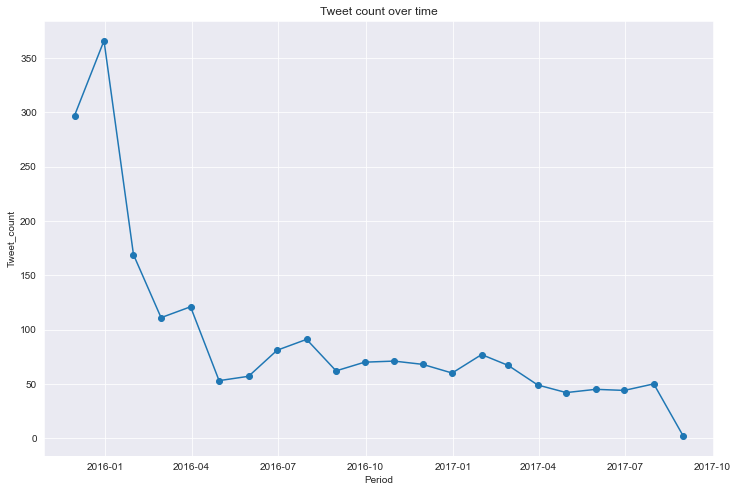

In [106]:
# Number of tweet over time
tweet_count_monthly=master_data.groupby(pd.Grouper(key = 'date', freq = "M")).count().reset_index()

sns.set_style("darkgrid")

plt.figure(figsize=(12,8))
plt.xlabel('Period')
plt.ylabel('Tweet_count')
plt.title('Tweet count over time')

plt.plot(tweet_count_monthly.date, tweet_count_monthly.tweet_id, marker='o');

The line trend show a decline in the WeRateDogs tweets over the  period under review 

In [100]:
# Another insight we would visualize is the correlation between the retweets and the favorites count the scatterplots

# using the function regplot to make a scatterplot with linear regression fit line
plt.figure(figsize=(12,8))

plt.xlabel('Favorites')
plt.ylabel('Retweets')
plt.title('Correlation between favorites and retweets count')

sns.regplot(x=master_data["favorite_count"], y=master_data["retweet_count"]);

The favorite count and the retweet count are strongly positively correlated . This implies that as the favorite_count increases, the retweet_count also increases, this translates that individuals that liked the tweets might as well have them retweeted.

C:\Users\Ibukun\AppData\Local\Temp\ipykernel_11040\20418654.py:10: UserWarning: Legend does not support 'R' instances.
A proxy artist may be used instead.
See: https://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  plt.legend('Retweet Count', 'Favorite count');
C:\Users\Ibukun\AppData\Local\Temp\ipykernel_11040\20418654.py:10: UserWarning: Legend does not support 'e' instances.
A proxy artist may be used instead.
See: https://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  plt.legend('Retweet Count', 'Favorite count');
C:\Users\Ibukun\AppData\Local\Temp\ipykernel_11040\20418654.py:10: UserWarning: Legend does not support 't' instances.
A proxy artist may be used instead.
See: https://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  plt.legend('Retweet Count', 'Favorite count');
C:\Users\Ibuk

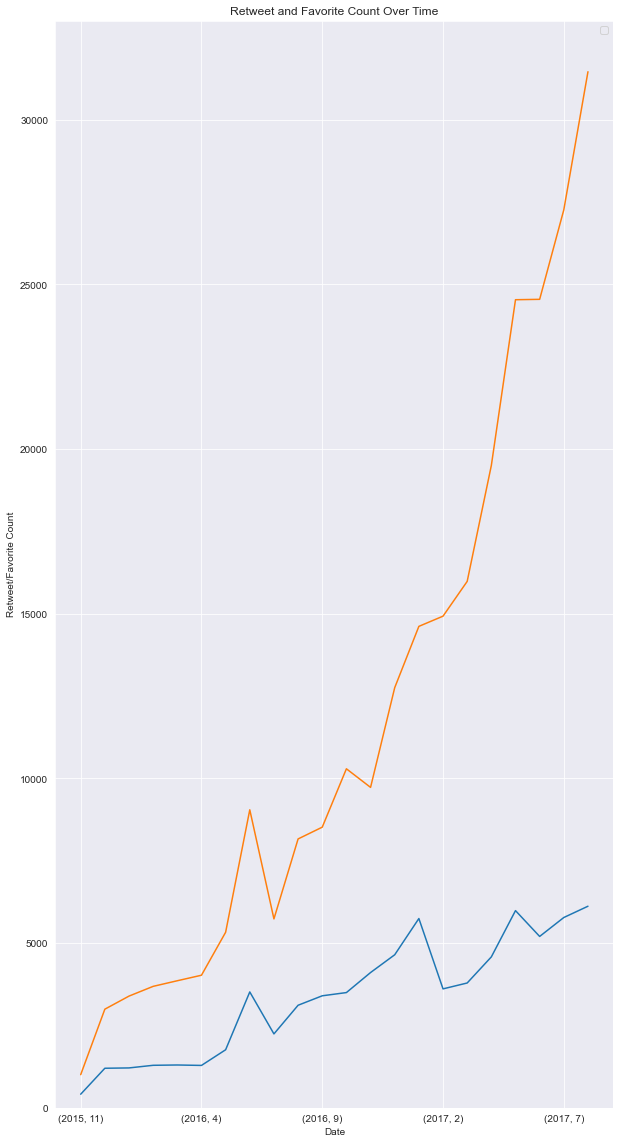

In [133]:
plt.subplots(1, sharex=True)

master_data.retweet_count.groupby([master_data["date"].dt.year, master_data["date"].dt.month]).mean().plot(kind='line')
master_data.favorite_count.groupby([master_data["date"].dt.year, master_data["date"].dt.month]).mean().plot(kind='line').set_ylim(0, )

plt.xlabel('Date')
plt.ylabel('Retweet/Favorite Count')
plt.title('Retweet and Favorite Count Over Time')
plt.grid(True)
plt.legend('Retweet Count', 'Favorite count');

Source: https://www.analyticsvidhya.com/blog/2021/10/a-comprehensive-guide-on-data-visualization-in-python/

There is a steady groeth in the counts of retweets and likes but the growth in the favorite count tends to be more which depicts that less new tweets does not affect the number of likes a tweet gets.

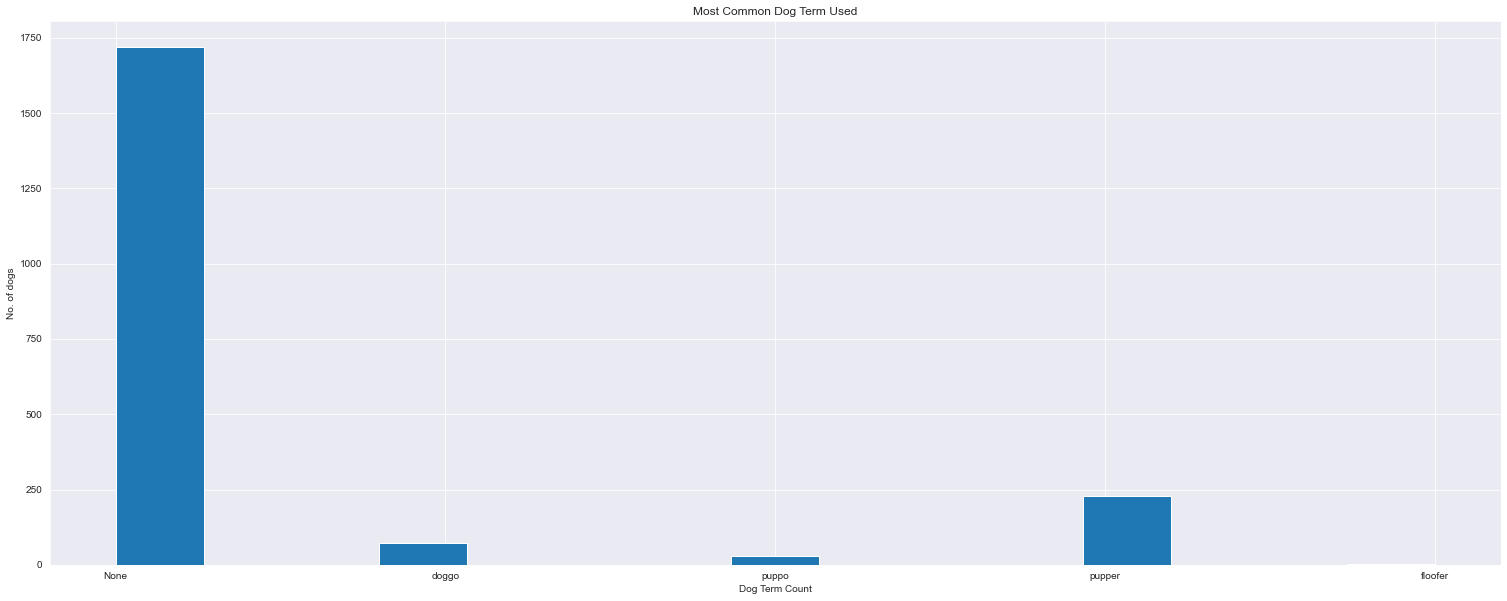

In [123]:
plt.hist(master_data['dog_terms'], bins=15)

plt.xlabel("Dog Term Count")
plt.ylabel("No. of dogs")
plt.title("Most Common Dog Term Used")
plt.show()

Text(0.5, 0, 'Prediction Count')

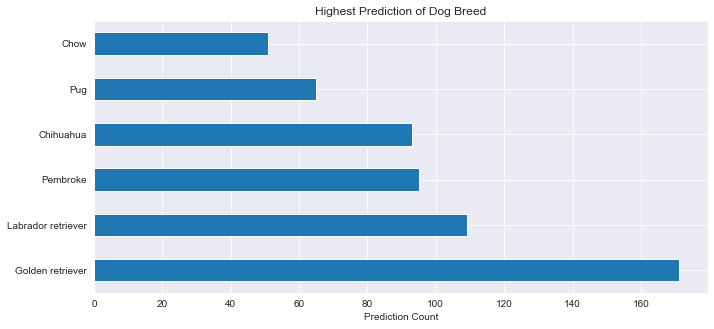

In [135]:
master_data.breed_prediction.value_counts()[1:7].plot(kind='barh', figsize=(11,5), title='Highest Prediction of Dog Breed').set_xlabel("Prediction Count");

The breed with the highest prediction is Golden Retriever